In [2]:
import pandas as pd
train_df = pd.read_csv('dataset/train.csv')
train_df.head()

,id,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,16979,3.346870,0.620101,0.945172,1.0,0.0,0.0,1.0,0
1,12430,14.482868,0.170185,1.084836,1.0,0.0,0.0,1.0,0
2,19872,5.740898,0.167525,3.969652,1.0,0.0,0.0,1.0,0
3,18763,4.098570,0.291850,0.084129,1.0,1.0,0.0,1.0,1
4,13547,7.539580,0.294439,2.890880,1.0,1.0,0.0,0.0,0


In [3]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [4]:
input_columns = train_df.columns[1:-1]
input_columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order'],
      dtype='object')

In [5]:
model = model.fit(train_df[input_columns], train_df['fraud'])

In [6]:
model.score(train_df[input_columns], train_df['fraud'])


0.914

In [7]:
predictions = model.predict(train_df[input_columns])
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [8]:
predictions.mean()

0.0

In [9]:
from sklearn.metrics import f1_score
f1_score(predictions, train_df['fraud'])

0.0

In [10]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# balanced_model = LogisticRegression(class_weight='balanced')
# balanced_model = GradientBoostingClassifier()
balanced_model =RandomForestClassifier(n_estimators=15, max_depth=3, class_weight={1: 100, 0: 1})
# balanced_model = SVC(class_weight='balanced')
# balanced_model = DecisionTreeClassifier(class_weight='balanced')

balanced_model = balanced_model.fit(train_df[input_columns], train_df['fraud'])
balanced_model.score(train_df[input_columns], train_df['fraud'])

0.0865

In [11]:
balanced_predictions = balanced_model.predict(train_df[input_columns])
fbeta_score(balanced_predictions, train_df['fraud'], beta = 0.5)
# balanced_predictions.mean()

NameError: name 'fbeta_score' is not defined

In [12]:
test_df = pd.read_csv('dataset/test.csv')
test_df.head()

,id,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,12367,2.067482,0.064300,1.472587,1.0,0.0,0.0,1.0
1,10942,9.078248,0.058169,1.494500,1.0,0.0,0.0,1.0
2,12171,2.156680,0.343030,0.419576,1.0,0.0,0.0,1.0
3,17800,3.087393,0.424519,0.879299,1.0,0.0,0.0,0.0
4,14230,14.162849,0.072577,1.262928,1.0,0.0,0.0,0.0


In [13]:
predictions = balanced_model.predict(test_df[input_columns])
predictions


array([1, 1, 1, ..., 1, 1, 1])

In [14]:
submission_df = test_df.copy()
submission_df['fraud'] = predictions.astype(int)
submission_df[['id', 'fraud']].to_csv('submission.csv', index=False)

In [15]:
from sklearn.model_selection import train_test_split

val_train_df, val_test_df = train_test_split(train_df, random_state=12)

In [16]:
print(len(val_train_df))
print(len(val_test_df))

13500
4500


In [17]:
input_columns = train_df.columns[1:-1]

model = LogisticRegression(class_weight='balanced')
model = model.fit(val_train_df[input_columns], val_train_df['fraud'])

In [18]:
from sklearn.metrics import fbeta_score
validation_predictions = model.predict(val_test_df[input_columns])
fbeta_score(validation_predictions, val_test_df['fraud'], beta=0.5)

0.2415143603133159

In [19]:

from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=2, class_weight='balanced')
decision_tree = decision_tree.fit(val_train_df[input_columns], val_train_df['fraud'])

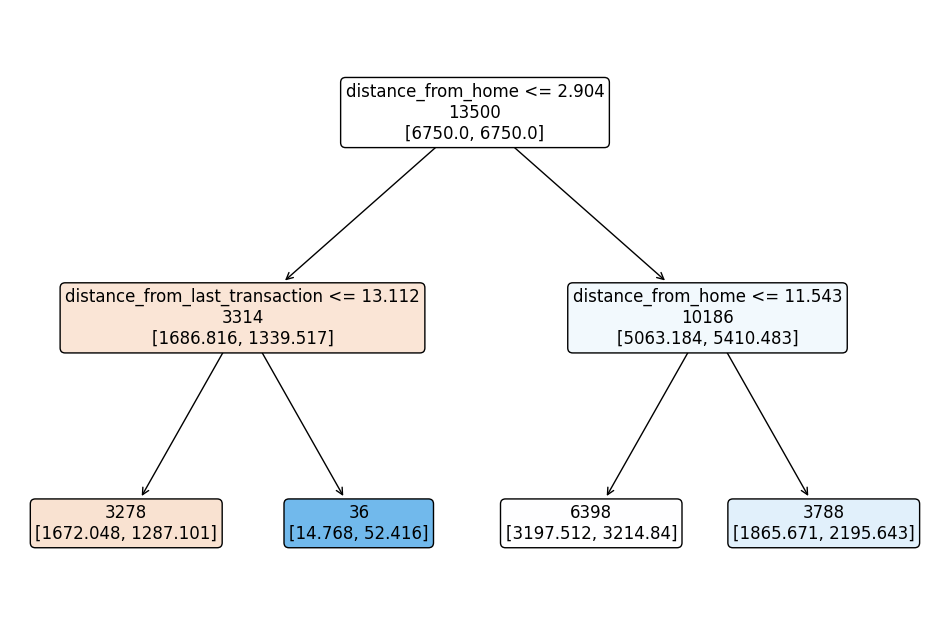

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
tree.plot_tree(decision_tree, rounded=True, impurity=False, filled=True, label=None, feature_names=input_columns, fontsize=12, max_depth=2)
plt.show()

In [21]:
decision_tree_predictions = decision_tree.predict(val_test_df[input_columns])
fbeta_score(decision_tree_predictions, val_test_df['fraud'], beta=0.5)

0.29174237835655165

In [22]:
scores = []
depths = list(range(1,20))
for depth in depths:
    decision_tree = DecisionTreeClassifier(max_depth=depth, class_weight='balanced')
    decision_tree = decision_tree.fit(val_train_df[input_columns], val_train_df['fraud'])
    # decision_tree_predictions = decision_tree.predict(val_test_df[input_columns])
    # score = fbeta_score(decision_tree_predictions, val_test_df['fraud'], beta=0.5)
    decision_tree_predictions = decision_tree.predict(val_train_df[input_columns])
    score = fbeta_score(decision_tree_predictions, val_train_df['fraud'], beta=0.5)
    scores.append(score)

Text(0.5, 1.0, 'Is a bigger tree always better?')

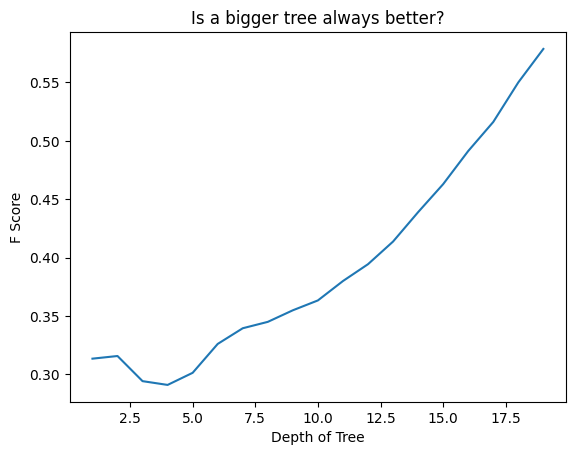

In [23]:
plt.plot(depths, scores)
plt.xlabel('Depth of Tree')
plt.ylabel('F Score')
plt.title('Is a bigger tree always better?')

In [24]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(
    n_estimators=15,
    max_depth=3,
    class_weight={1: 100, 0: 1})

random_forest = random_forest.fit(val_train_df[input_columns], val_train_df['fraud'])

In [25]:
random_forest_predictions = random_forest.predict(val_test_df[input_columns])
fbeta_score(random_forest_predictions, val_test_df['fraud'], beta=0.5)

0.32116908850726555

In [26]:
predictions = random_forest.predict(test_df[input_columns])
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [27]:
submission_df = test_df.copy()
submission_df['fraud'] = predictions.astype(int)
submission_df[['id', 'fraud']].to_csv('submission.csv', index=False)

In [61]:
from sklearn.ensemble import VotingClassifier
voting_classifier = VotingClassifier(
    estimators=[('lr', balanced_model), ('dt', decision_tree), ('rf', random_forest)],
    voting='soft'  # Use 'hard' for majority voting or 'soft' for weighted voting
)

In [77]:
voting_classifier.fit(val_train_df[input_columns], val_train_df['fraud'])

VotingClassifier(estimators=[('lr',
                              LogisticRegression(class_weight='balanced')),
                             ('dt',
                              DecisionTreeClassifier(class_weight='balanced',
                                                     max_depth=19)),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1,
                                                                   1: 100},
                                                     max_depth=3,
                                                     n_estimators=10))],
                 voting='soft')

In [80]:
predictionsvoting = voting_classifier.predict(val_test_df[input_columns])
predictionsvoting
fbeta_score(predictionsvoting, val_test_df['fraud'], beta=0.5)

0.24427270218051342

In [83]:
predictions = voting_classifier.predict(test_df[input_columns])
predictions

array([0, 1, 1, ..., 0, 1, 0])

In [84]:
submission_df = test_df.copy()
submission_df['fraud'] = predictions.astype(int)
submission_df[['id', 'fraud']].to_csv('submission.csv', index=False)